Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.93333333 0.9       ]
Mean Accuracy: 0.9400000000000001


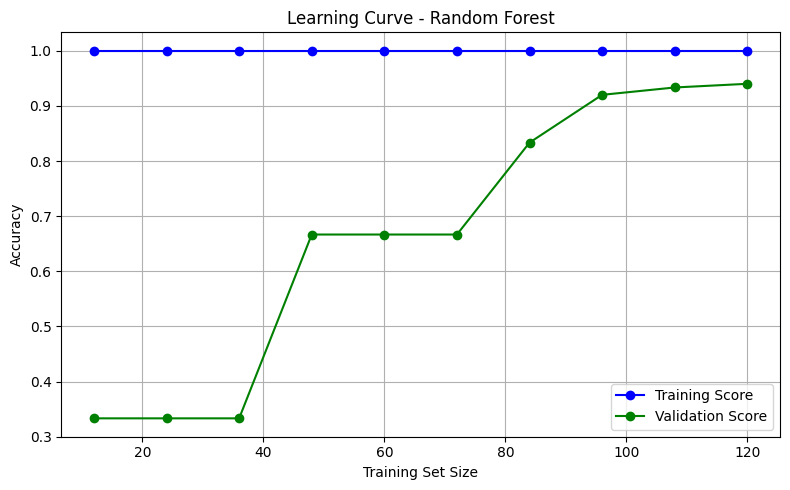

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, learning_curve, KFold

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=kfold, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Score')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
